# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from pprint import pprint
import datetime #https://tecadmin.net/get-current-date-time-python/

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "appid=" + api_key +"&units=" + units + "&q="

In [4]:
# created lists to append and counters for iteration
# determined max number of sets to expect

City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

Set = 1
Count = 1

# source of round up: https://stackoverflow.com/questions/2356501/how-do-you-round-up-a-number-in-python
Max_Set = -(-len(cities)//50)
print(Max_Set)

13


In [5]:
#set up call for api and appending results
#found issue that none attribute would result under get name for null responses
#created if to skip those to ensure lists were same length at end

for city in cities:
    print(f"Processing Record {Count} of Set {Set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        if response.get("name") == None:
            pass
        else:
            City.append(response.get("name"))
        Cloudiness.append(response.get("clouds").get("all"))
        Country.append(response.get("sys").get("country"))
        Date.append(response.get("dt"))
        Humidity.append(response.get("main").get("humidity"))
        Lat.append(response.get("coord").get("lat"))
        Lng.append(response.get("coord").get("lon"))
        Max_Temp.append(response.get("main").get("temp_max"))
        Wind_Speed.append(response.get("wind").get("speed"))
    except (KeyError, IndexError, AttributeError):
        print("City not found. Skipping...")
    
    
    if Count % 50 == 0: #https://www.pythoncentral.io/using-python-to-check-for-odd-or-even-numbers/
        Set = Set + 1
        Count = 0
        time.sleep(60)  #https://stackoverflow.com/questions/24409861/tell-python-to-wait-pause-a-for-loop
                        #http://www.pressthered.com/how_to_sleep_pause_wait_stop_your_python_code/
    Count = Count + 1

Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | faya
Processing Record 3 of Set 1 | hukuntsi
Processing Record 4 of Set 1 | haines junction
Processing Record 5 of Set 1 | salvador
Processing Record 6 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | saint-georges
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | nikel
Processing Record 12 of Set 1 | ancud
Processing Record 13 of Set 1 | manzanillo
Processing Record 14 of Set 1 | andenes
City not found. Skipping...
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | niksar
Processing Record 20 of Set 1 | namibe
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | mazamari
Processing Record 23 of Set 

Processing Record 37 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 38 of Set 4 | inverness
Processing Record 39 of Set 4 | narsaq
Processing Record 40 of Set 4 | bossangoa
Processing Record 41 of Set 4 | sorong
Processing Record 42 of Set 4 | saint-pierre
Processing Record 43 of Set 4 | rawson
Processing Record 44 of Set 4 | lodwar
Processing Record 45 of Set 4 | zhezkazgan
Processing Record 46 of Set 4 | sakakah
City not found. Skipping...
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | inhambane
Processing Record 49 of Set 4 | bougouni
Processing Record 50 of Set 4 | chiredzi
Processing Record 1 of Set 5 | tacoronte
Processing Record 2 of Set 5 | eregli
Processing Record 3 of Set 5 | somerset east
Processing Record 4 of Set 5 | asosa
Processing Record 5 of Set 5 | buchanan
Processing Record 6 of Set 5 | yulara
Processing Record 7 of Set 5 | lahat
Processing Record 8 of Set 5 | zinder
Processing Record 9 of Set 5 | auki
Processing Record 

Processing Record 25 of Set 8 | marica
Processing Record 26 of Set 8 | ola
Processing Record 27 of Set 8 | cajati
Processing Record 28 of Set 8 | shimoda
Processing Record 29 of Set 8 | norman wells
Processing Record 30 of Set 8 | dingle
Processing Record 31 of Set 8 | mangan
Processing Record 32 of Set 8 | taksimo
Processing Record 33 of Set 8 | vrangel
Processing Record 34 of Set 8 | pevek
Processing Record 35 of Set 8 | nivala
Processing Record 36 of Set 8 | azanka
Processing Record 37 of Set 8 | te anau
Processing Record 38 of Set 8 | arona
Processing Record 39 of Set 8 | lebu
Processing Record 40 of Set 8 | sjoholt
Processing Record 41 of Set 8 | san antonio
Processing Record 42 of Set 8 | bonthe
Processing Record 43 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 44 of Set 8 | katsuura
Processing Record 45 of Set 8 | pyinmana
Processing Record 46 of Set 8 | tommot
Processing Record 47 of Set 8 | samana
Processing Record 48 of Set 8 | chifeng
Processing Record 

Processing Record 11 of Set 12 | oranjemund
Processing Record 12 of Set 12 | raton
Processing Record 13 of Set 12 | hami
Processing Record 14 of Set 12 | natal
Processing Record 15 of Set 12 | timmins
Processing Record 16 of Set 12 | maningrida
Processing Record 17 of Set 12 | batesville
Processing Record 18 of Set 12 | pala
Processing Record 19 of Set 12 | goderich
Processing Record 20 of Set 12 | orcopampa
Processing Record 21 of Set 12 | north bend
Processing Record 22 of Set 12 | berlevag
Processing Record 23 of Set 12 | oussouye
Processing Record 24 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 25 of Set 12 | olafsvik
City not found. Skipping...
Processing Record 26 of Set 12 | coihaique
Processing Record 27 of Set 12 | wysokie mazowieckie
Processing Record 28 of Set 12 | russell
Processing Record 29 of Set 12 | vila velha
Processing Record 30 of Set 12 | gushi
Processing Record 31 of Set 12 | sandwick
Processing Record 32 of Set 12 | hobyo
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#created dictionary from results and converted to df then exported to csv
weather = {"City" : City,
          "Cloudiness" : Cloudiness,
          "Country" : Country,
          "Date" : Date,
          "Humidity" : Humidity,
          "Lat" : Lat,
          "Lng" : Lng,
          "Max Temp" : Max_Temp,
          "Wind Speed" : Wind_Speed}

weather_df = pd.DataFrame(weather)
weather_df.to_csv(os.path.join("Output_Data","Cities.csv"), index = False)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,1,US,1573966941,78,42.65,-73.75,21.00,1.61
1,Faya,62,SA,1573967103,71,18.39,42.45,53.60,5.97
2,Hukuntsi,0,BW,1573967103,11,-23.98,21.76,80.64,10.04
3,Haines Junction,100,CA,1573967103,97,60.75,-137.51,23.31,2.80
4,Salvador,40,BR,1573967103,78,-12.98,-38.48,80.60,11.41


In [14]:
#just reconfirming no null values
weather_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max Temp      565
Wind Speed    565
dtype: int64

In [15]:
#found way to capture current date and format to match sample from instructions
currentDT = datetime.date.today().strftime("%m/%d/%Y")
print(currentDT)

11/16/2019


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

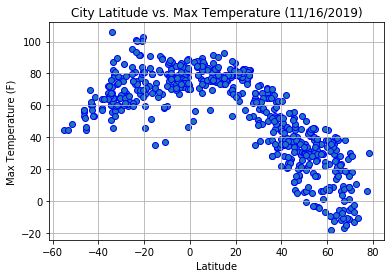

In [16]:
#created chart based on example from instructions
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolors='b')

#created title, labels and set grid based on example from instructions
plt.title(f"City Latitude vs. Max Temperature ({currentDT})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#output picture of chart
plt.savefig("Output_Data/City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

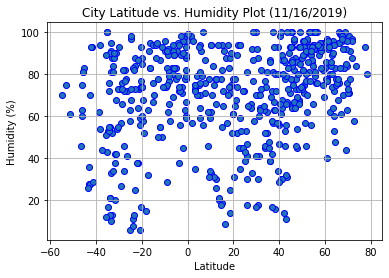

In [17]:
#created chart based on example from instructions
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolors='b')

#created title, labels and set grid based on example from instructions
plt.title(f"City Latitude vs. Humidity Plot ({currentDT})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#output picture of chart
plt.savefig("Output_Data/City Latitude vs. Humidity Plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

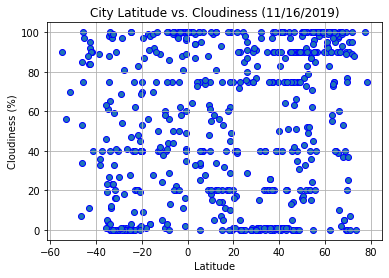

In [18]:
#created chart based on example from instructions
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolors='b')

#created title, labels and set grid based on example from instructions
plt.title(f"City Latitude vs. Cloudiness ({currentDT})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#output picture of chart
plt.savefig("Output_Data/City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

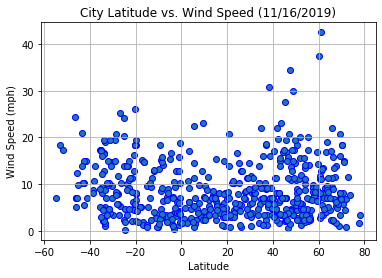

In [19]:
#created chart based on example from instructions
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolors='b')

#created title, labels and set grid based on example from instructions
plt.title(f"City Latitude vs. Wind Speed ({currentDT})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#output picture of chart
plt.savefig("Output_Data/City Latitude vs. Wind Speed.png")
plt.show()